In [674]:
# The follwoing notebook is broken down into sections.
# Section 1 will be loading the data located in folder CMAPSSData.
# Section 2 will be pre processing the data.
# section 3 Will be Some data analysis
# Section 4 Will be training the data.
# Section 5 will be validation
# Section 6 will be testing
# section 7 will be closing thoughts and conclusion.





# necessary imports

import numpy as np
import pandas as pd
import matplotlib
import csv
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import LinearSVC






# Section 1

In [675]:
# Section 1 will be loading the data located in folder CMAPSSData.


# will create 4 different data frames for each data set, train and test.
# in total there will be 8 data frames.
# They will be diffrerent bvecause:  
# " Four different were sets simulated under different combinations of operational conditions and fault modes. 
# Records several sensor channels to characterize fault evolution. 
# The data set was provided by the Prognostics CoE at NASA Ames"
# source: https://www.kaggle.com/datasets/behrad3d/nasa-cmaps
# it is to be inferred that, data set train_FD001 corresponds to data set test_FD001 ... etc.






In [676]:
# converting train txt file to csv file.

with open('D:/MachineLearningFall2024/MLFinalProject/CMAPSSData/train_FD001.txt','r') as file:
    # stripped will call the line.strip fucntion to 
    # grab each line from the text file
    stripped = (line.strip() for line in file)

    # lines will go line for line in stripped, and
    # split the data into columns every delimeter.
   
    lines = (line.split() for line in stripped if line)



    with open('D:/MachineLearningFall2024/MLFinalProject/PedroMLProject/train_FD001.csv','w') as csvFile:
        # creating writer object to write to file
        writer = csv.writer(csvFile)

        # writing column names
        writer.writerow(('EngineID','Cycle','op1','op2','op3','sensor1', 
                        'sensor2','sensor3','sensor4','sensor5','sensor6', 
                        'sensor7','sensor8','sensor9','sensor10','sensor11', 
                        'sensor12','sensor13','sensor14','sensor15','sensor16', 
                        'sensor17','sensor18','sensor19','sensor20','sensor21'))
        
        # writing actual data to columns per row at a time
        writer.writerows(lines)

csvFile.close
file.close
       

<function TextIOWrapper.close()>

In [677]:
# converting testing txt files to csv

with open('D:/MachineLearningFall2024/MLFinalProject/CMAPSSData/test_FD001.txt','r') as file:
    # stripped will call the line.strip fucntion to 
    # grab each line from the text file
    stripped = (line.strip() for line in file)

    # lines will go line for line in stripped, and
    # split the data into columns every delimeter.
   
    lines = (line.split() for line in stripped if line)



    with open('D:/MachineLearningFall2024/MLFinalProject/PedroMLProject/test_FD001.csv','w') as csvFile:
        # creating writer object to write to file
        writer = csv.writer(csvFile)

        # writing column names
        writer.writerow(('EngineID','Cycle','op1','op2','op3','sensor1', 
                        'sensor2','sensor3','sensor4','sensor5','sensor6', 
                        'sensor7','sensor8','sensor9','sensor10','sensor11', 
                        'sensor12','sensor13','sensor14','sensor15','sensor16', 
                        'sensor17','sensor18','sensor19','sensor20','sensor21'))
        
        # writing actual data to columns per row at a time
        writer.writerows(lines)

csvFile.close
file.close

<function TextIOWrapper.close()>

In [678]:
# convert RUL file to csv file

with open('D:/MachineLearningFall2024/MLFinalProject/CMAPSSData/RUL_FD001.txt','r') as file:
    # stripped will call the line.strip fucntion to 
    # grab each line from the text file
    stripped = (line.strip() for line in file)

    # lines will go line for line in stripped, and
    # split the data into columns every delimeter.
   
    lines = (line.split() for line in stripped if line)



    with open('D:/MachineLearningFall2024/MLFinalProject/PedroMLProject/RUL_FD001.csv','w') as csvFile:
        # creating writer object to write to file
        writer = csv.writer(csvFile)

        # writing column names
        writer.writerow(["Remaing Useful Life"])
        
        # writing actual data to columns per row at a time
        writer.writerows(lines)

csvFile.close
file.close

<function TextIOWrapper.close()>

In [679]:
# creating data frames of the training and test data.

dfTrain = pd.read_csv('D:/MachineLearningFall2024/MLFinalProject/PedroMLProject/train_FD001.csv')
dfTest = pd.read_csv('D:/MachineLearningFall2024/MLFinalProject/PedroMLProject/test_FD001.csv')


In [680]:
print('-----Training Data Frame - First 20 rows-----')

# dispplaying first 10 rows.
dfTrain.head(10)

-----Training Data Frame - First 20 rows-----


,EngineID,Cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


In [681]:
print('-----Testing Data Frame - First 20 rows-----')

# dispplaying first 10 rows.
dfTest.head(10)

-----Testing Data Frame - First 20 rows-----


,EngineID,Cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
5,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467
6,1,7,-0.0000,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,...,522.01,2388.06,8134.97,8.3914,0.03,391,2388,100.0,38.85,23.3952
7,1,8,0.0006,-0.0000,100.0,518.67,642.54,1580.89,1400.89,14.62,...,522.09,2388.06,8125.93,8.4213,0.03,393,2388,100.0,39.05,23.3224
8,1,9,-0.0036,0.0000,100.0,518.67,641.88,1593.29,1412.28,14.62,...,522.03,2388.05,8134.15,8.4353,0.03,391,2388,100.0,39.10,23.4521
9,1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,...,522.00,2388.06,8134.08,8.4093,0.03,391,2388,100.0,38.87,23.3820


# Data Preprocessing

1. Data cleaning
    - remove low variance columns, indicates very simlar values, which wont help much
    - remove empty columns/rows
2. Data normalization
3. Feature Engineering
4. Data splitting

In [682]:
# removing empty columns
# removing empty rows
# returning the same dataframe, inplace=true

dfTrain.dropna(axis=1, inplace=True)
print(dfTrain.head(5))
dfTrain.dropna(axis=0, inplace=True)
print(dfTrain.head(5))


# finding standard deviation of columns 
# # useful in order to decide which columns wont be necessary for 
print(dfTrain.std())


   EngineID  Cycle     op1     op2    op3  sensor1  sensor2  sensor3  sensor4  \
0         1      1 -0.0007 -0.0004  100.0   518.67   641.82  1589.70  1400.60   
1         1      2  0.0019 -0.0003  100.0   518.67   642.15  1591.82  1403.14   
2         1      3 -0.0043  0.0003  100.0   518.67   642.35  1587.99  1404.20   
3         1      4  0.0007  0.0000  100.0   518.67   642.35  1582.79  1401.87   
4         1      5 -0.0019 -0.0002  100.0   518.67   642.37  1582.85  1406.22   

   sensor5  ...  sensor12  sensor13  sensor14  sensor15  sensor16  sensor17  \
0    14.62  ...    521.66   2388.02   8138.62    8.4195      0.03       392   
1    14.62  ...    522.28   2388.07   8131.49    8.4318      0.03       392   
2    14.62  ...    522.42   2388.03   8133.23    8.4178      0.03       390   
3    14.62  ...    522.86   2388.08   8133.83    8.3682      0.03       392   
4    14.62  ...    522.19   2388.04   8133.80    8.4294      0.03       393   

   sensor18  sensor19  sensor20  senso

In [683]:
# removing columns which produce a small standard deviation.
# std < .5 or std = 0
# Removing
# op3,senor1,sensor2,sensor5,sensor6,sensor8,sensor10,sensor11,sensor13,sensor15,sensor16,sensor18,sensor19,sensor20,sensor21

removeColumns = ['op3','sensor1','sensor2','sensor5','sensor6','sensor8','sensor10','sensor11','sensor13','sensor15','sensor16','sensor18','sensor19','sensor20','sensor21']
newDfTrain = dfTrain.drop(removeColumns,axis=1,inplace = False)

newDfTrain.head(5)

,EngineID,Cycle,op1,op2,sensor3,sensor4,sensor7,sensor9,sensor12,sensor14,sensor17
0,1,1,-0.0007,-0.0004,1589.70,1400.60,554.36,9046.19,521.66,8138.62,392
1,1,2,0.0019,-0.0003,1591.82,1403.14,553.75,9044.07,522.28,8131.49,392
2,1,3,-0.0043,0.0003,1587.99,1404.20,554.26,9052.94,522.42,8133.23,390
3,1,4,0.0007,0.0000,1582.79,1401.87,554.45,9049.48,522.86,8133.83,392
4,1,5,-0.0019,-0.0002,1582.85,1406.22,554.00,9055.15,522.19,8133.80,393


In [684]:
# Need to create a classification coulmn
# RUL remaining uselful lifecylces column
# Max cycles - current cycle



# have to find the max cycle per engine


maxCycles = pd.DataFrame(newDfTrain.groupby('EngineID')['Cycle'].max()).reset_index()
maxCycles.columns = ['EngineID', 'Max cycles']
newDfTrain = newDfTrain.merge(maxCycles,on=['EngineID'],how='left')
newDfTrain.head(5)


,EngineID,Cycle,op1,op2,sensor3,sensor4,sensor7,sensor9,sensor12,sensor14,sensor17,Max cycles
0,1,1,-0.0007,-0.0004,1589.70,1400.60,554.36,9046.19,521.66,8138.62,392,192
1,1,2,0.0019,-0.0003,1591.82,1403.14,553.75,9044.07,522.28,8131.49,392,192
2,1,3,-0.0043,0.0003,1587.99,1404.20,554.26,9052.94,522.42,8133.23,390,192
3,1,4,0.0007,0.0000,1582.79,1401.87,554.45,9049.48,522.86,8133.83,392,192
4,1,5,-0.0019,-0.0002,1582.85,1406.22,554.00,9055.15,522.19,8133.80,393,192


In [685]:
# generating the value for the remainng life cycle column

newDfTrain['Remaining Life Cycles'] = newDfTrain['Max cycles'] - newDfTrain['Cycle']
newDfTrain.head()

,EngineID,Cycle,op1,op2,sensor3,sensor4,sensor7,sensor9,sensor12,sensor14,sensor17,Max cycles,Remaining Life Cycles
0,1,1,-0.0007,-0.0004,1589.70,1400.60,554.36,9046.19,521.66,8138.62,392,192,191
1,1,2,0.0019,-0.0003,1591.82,1403.14,553.75,9044.07,522.28,8131.49,392,192,190
2,1,3,-0.0043,0.0003,1587.99,1404.20,554.26,9052.94,522.42,8133.23,390,192,189
3,1,4,0.0007,0.0000,1582.79,1401.87,554.45,9049.48,522.86,8133.83,392,192,188
4,1,5,-0.0019,-0.0002,1582.85,1406.22,554.00,9055.15,522.19,8133.80,393,192,187


In [686]:
# we must create a number, for the cycles, which determines a threshold for maintenance.
# meaining, below this number of cycles, the engine requires maintenance.
# The RUL label will be 1 for needs maintenance, 0 for no maintenance needed.

threshold = 35
newDfTrain['RUL'] = np.where(newDfTrain['Remaining Life Cycles'] <= threshold, 1,0)
newDfTrain.drop('Max cycles',axis=1,inplace=True)
newDfTrain.head(200)





,EngineID,Cycle,op1,op2,sensor3,sensor4,sensor7,sensor9,sensor12,sensor14,sensor17,Remaining Life Cycles,RUL
0,1,1,-0.0007,-0.0004,1589.70,1400.60,554.36,9046.19,521.66,8138.62,392,191,0
1,1,2,0.0019,-0.0003,1591.82,1403.14,553.75,9044.07,522.28,8131.49,392,190,0
2,1,3,-0.0043,0.0003,1587.99,1404.20,554.26,9052.94,522.42,8133.23,390,189,0
3,1,4,0.0007,0.0000,1582.79,1401.87,554.45,9049.48,522.86,8133.83,392,188,0
4,1,5,-0.0019,-0.0002,1582.85,1406.22,554.00,9055.15,522.19,8133.80,393,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,4,0.0035,-0.0004,1584.15,1396.08,554.25,9058.01,522.49,8140.44,391,283,0
196,2,5,0.0005,0.0004,1579.03,1402.52,555.12,9058.15,522.27,8136.67,390,282,0
197,2,6,-0.0010,0.0004,1577.50,1396.76,554.98,9054.07,522.80,8133.65,392,281,0
198,2,7,0.0001,-0.0002,1587.49,1400.65,554.84,9052.67,522.14,8136.33,391,280,0


In [687]:
# Must repeat the same steps now for the test data
# removing empty columns
# removing empty rows
# returning the same dataframe, inplace=true

dfTest.dropna(axis=1, inplace=True)
print(dfTest.head(5))
dfTest.dropna(axis=0, inplace=True)
print(dfTest.head(5))


   EngineID  Cycle     op1     op2    op3  sensor1  sensor2  sensor3  sensor4  \
0         1      1  0.0023  0.0003  100.0   518.67   643.02  1585.29  1398.21   
1         1      2 -0.0027 -0.0003  100.0   518.67   641.71  1588.45  1395.42   
2         1      3  0.0003  0.0001  100.0   518.67   642.46  1586.94  1401.34   
3         1      4  0.0042  0.0000  100.0   518.67   642.44  1584.12  1406.42   
4         1      5  0.0014  0.0000  100.0   518.67   642.51  1587.19  1401.92   

   sensor5  ...  sensor12  sensor13  sensor14  sensor15  sensor16  sensor17  \
0    14.62  ...    521.72   2388.03   8125.55    8.4052      0.03       392   
1    14.62  ...    522.16   2388.06   8139.62    8.3803      0.03       393   
2    14.62  ...    521.97   2388.03   8130.10    8.4441      0.03       393   
3    14.62  ...    521.38   2388.05   8132.90    8.3917      0.03       391   
4    14.62  ...    522.15   2388.03   8129.54    8.4031      0.03       390   

   sensor18  sensor19  sensor20  senso

In [688]:
# for consistency we will eliminate the same columns which were removed from the training data. 
newDfTest = dfTest.drop(removeColumns,axis=1,inplace = False)
newDfTest.head(5)


,EngineID,Cycle,op1,op2,sensor3,sensor4,sensor7,sensor9,sensor12,sensor14,sensor17
0,1,1,0.0023,0.0003,1585.29,1398.21,553.90,9050.17,521.72,8125.55,392
1,1,2,-0.0027,-0.0003,1588.45,1395.42,554.85,9054.42,522.16,8139.62,393
2,1,3,0.0003,0.0001,1586.94,1401.34,554.11,9056.96,521.97,8130.10,393
3,1,4,0.0042,0.0000,1584.12,1406.42,554.07,9045.29,521.38,8132.90,391
4,1,5,0.0014,0.0000,1587.19,1401.92,554.16,9044.55,522.15,8129.54,390


In [689]:
# Need to create a classification coulmn
# RUL remaining uselful lifecylces column
# Max cycles - current cycle
# have to find the max cycle per engine


maxCycles = pd.DataFrame(newDfTest.groupby('EngineID')['Cycle'].max()).reset_index()
maxCycles.columns = ['EngineID', 'Max cycles']
newDfTest = newDfTest.merge(maxCycles,on=['EngineID'],how='left')
newDfTest.head(5)

,EngineID,Cycle,op1,op2,sensor3,sensor4,sensor7,sensor9,sensor12,sensor14,sensor17,Max cycles
0,1,1,0.0023,0.0003,1585.29,1398.21,553.90,9050.17,521.72,8125.55,392,31
1,1,2,-0.0027,-0.0003,1588.45,1395.42,554.85,9054.42,522.16,8139.62,393,31
2,1,3,0.0003,0.0001,1586.94,1401.34,554.11,9056.96,521.97,8130.10,393,31
3,1,4,0.0042,0.0000,1584.12,1406.42,554.07,9045.29,521.38,8132.90,391,31
4,1,5,0.0014,0.0000,1587.19,1401.92,554.16,9044.55,522.15,8129.54,390,31


In [690]:
# generating the value for the remainng life cycle column

newDfTest['Remaining Life Cycles'] = newDfTest['Max cycles'] - newDfTest['Cycle']
newDfTest.head()

,EngineID,Cycle,op1,op2,sensor3,sensor4,sensor7,sensor9,sensor12,sensor14,sensor17,Max cycles,Remaining Life Cycles
0,1,1,0.0023,0.0003,1585.29,1398.21,553.90,9050.17,521.72,8125.55,392,31,30
1,1,2,-0.0027,-0.0003,1588.45,1395.42,554.85,9054.42,522.16,8139.62,393,31,29
2,1,3,0.0003,0.0001,1586.94,1401.34,554.11,9056.96,521.97,8130.10,393,31,28
3,1,4,0.0042,0.0000,1584.12,1406.42,554.07,9045.29,521.38,8132.90,391,31,27
4,1,5,0.0014,0.0000,1587.19,1401.92,554.16,9044.55,522.15,8129.54,390,31,26


In [691]:
# we must create a number, for the cycles, which determines a threshold for maintenance.
# meaining, below this number of cycles, the engine requires maintenance.
# The RUL label will be 1 for needs maintenance, 0 for no maintenance needed.

threshold = 30
newDfTest['RUL'] = np.where(newDfTest['Remaining Life Cycles'] <= threshold, 1,0)
newDfTest.drop('Max cycles',axis=1,inplace=True)
newDfTest.head(200)


,EngineID,Cycle,op1,op2,sensor3,sensor4,sensor7,sensor9,sensor12,sensor14,sensor17,Remaining Life Cycles,RUL
0,1,1,0.0023,0.0003,1585.29,1398.21,553.90,9050.17,521.72,8125.55,392,30,1
1,1,2,-0.0027,-0.0003,1588.45,1395.42,554.85,9054.42,522.16,8139.62,393,29,1
2,1,3,0.0003,0.0001,1586.94,1401.34,554.11,9056.96,521.97,8130.10,393,28,1
3,1,4,0.0042,0.0000,1584.12,1406.42,554.07,9045.29,521.38,8132.90,391,27,1
4,1,5,0.0014,0.0000,1587.19,1401.92,554.16,9044.55,522.15,8129.54,390,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,116,0.0023,-0.0004,1592.18,1410.33,553.66,9058.16,520.93,8132.20,393,10,1
196,3,117,0.0022,-0.0005,1592.16,1418.62,552.80,9050.37,520.78,8126.62,395,9,1
197,3,118,-0.0019,0.0004,1596.46,1411.02,553.13,9056.80,520.71,8129.58,394,8,1
198,3,119,0.0057,-0.0003,1589.86,1414.47,553.15,9049.41,520.95,8133.90,393,7,1


# Data Visualization
    - will visualize data for a random engine.


In [692]:
# Lets look at engine 21


engine21 = newDfTrain[newDfTrain['EngineID'] == 21]
engine21.head()

,EngineID,Cycle,op1,op2,sensor3,sensor4,sensor7,sensor9,sensor12,sensor14,sensor17,Remaining Life Cycles,RUL
4168,21,1,-0.0017,-0.0005,1582.88,1410.66,553.57,9047.42,521.76,8128.48,395,194,0
4169,21,2,-0.0013,0.0004,1582.13,1404.54,553.22,9043.88,521.39,8120.15,392,193,0
4170,21,3,0.0025,-0.0003,1589.73,1408.88,553.21,9048.33,521.26,8124.89,392,192,0
4171,21,4,0.0013,-0.0003,1587.18,1409.45,553.30,9052.17,521.81,8126.21,393,191,0
4172,21,5,-0.0006,-0.0002,1596.51,1401.46,553.03,9047.48,521.82,8130.92,393,190,0


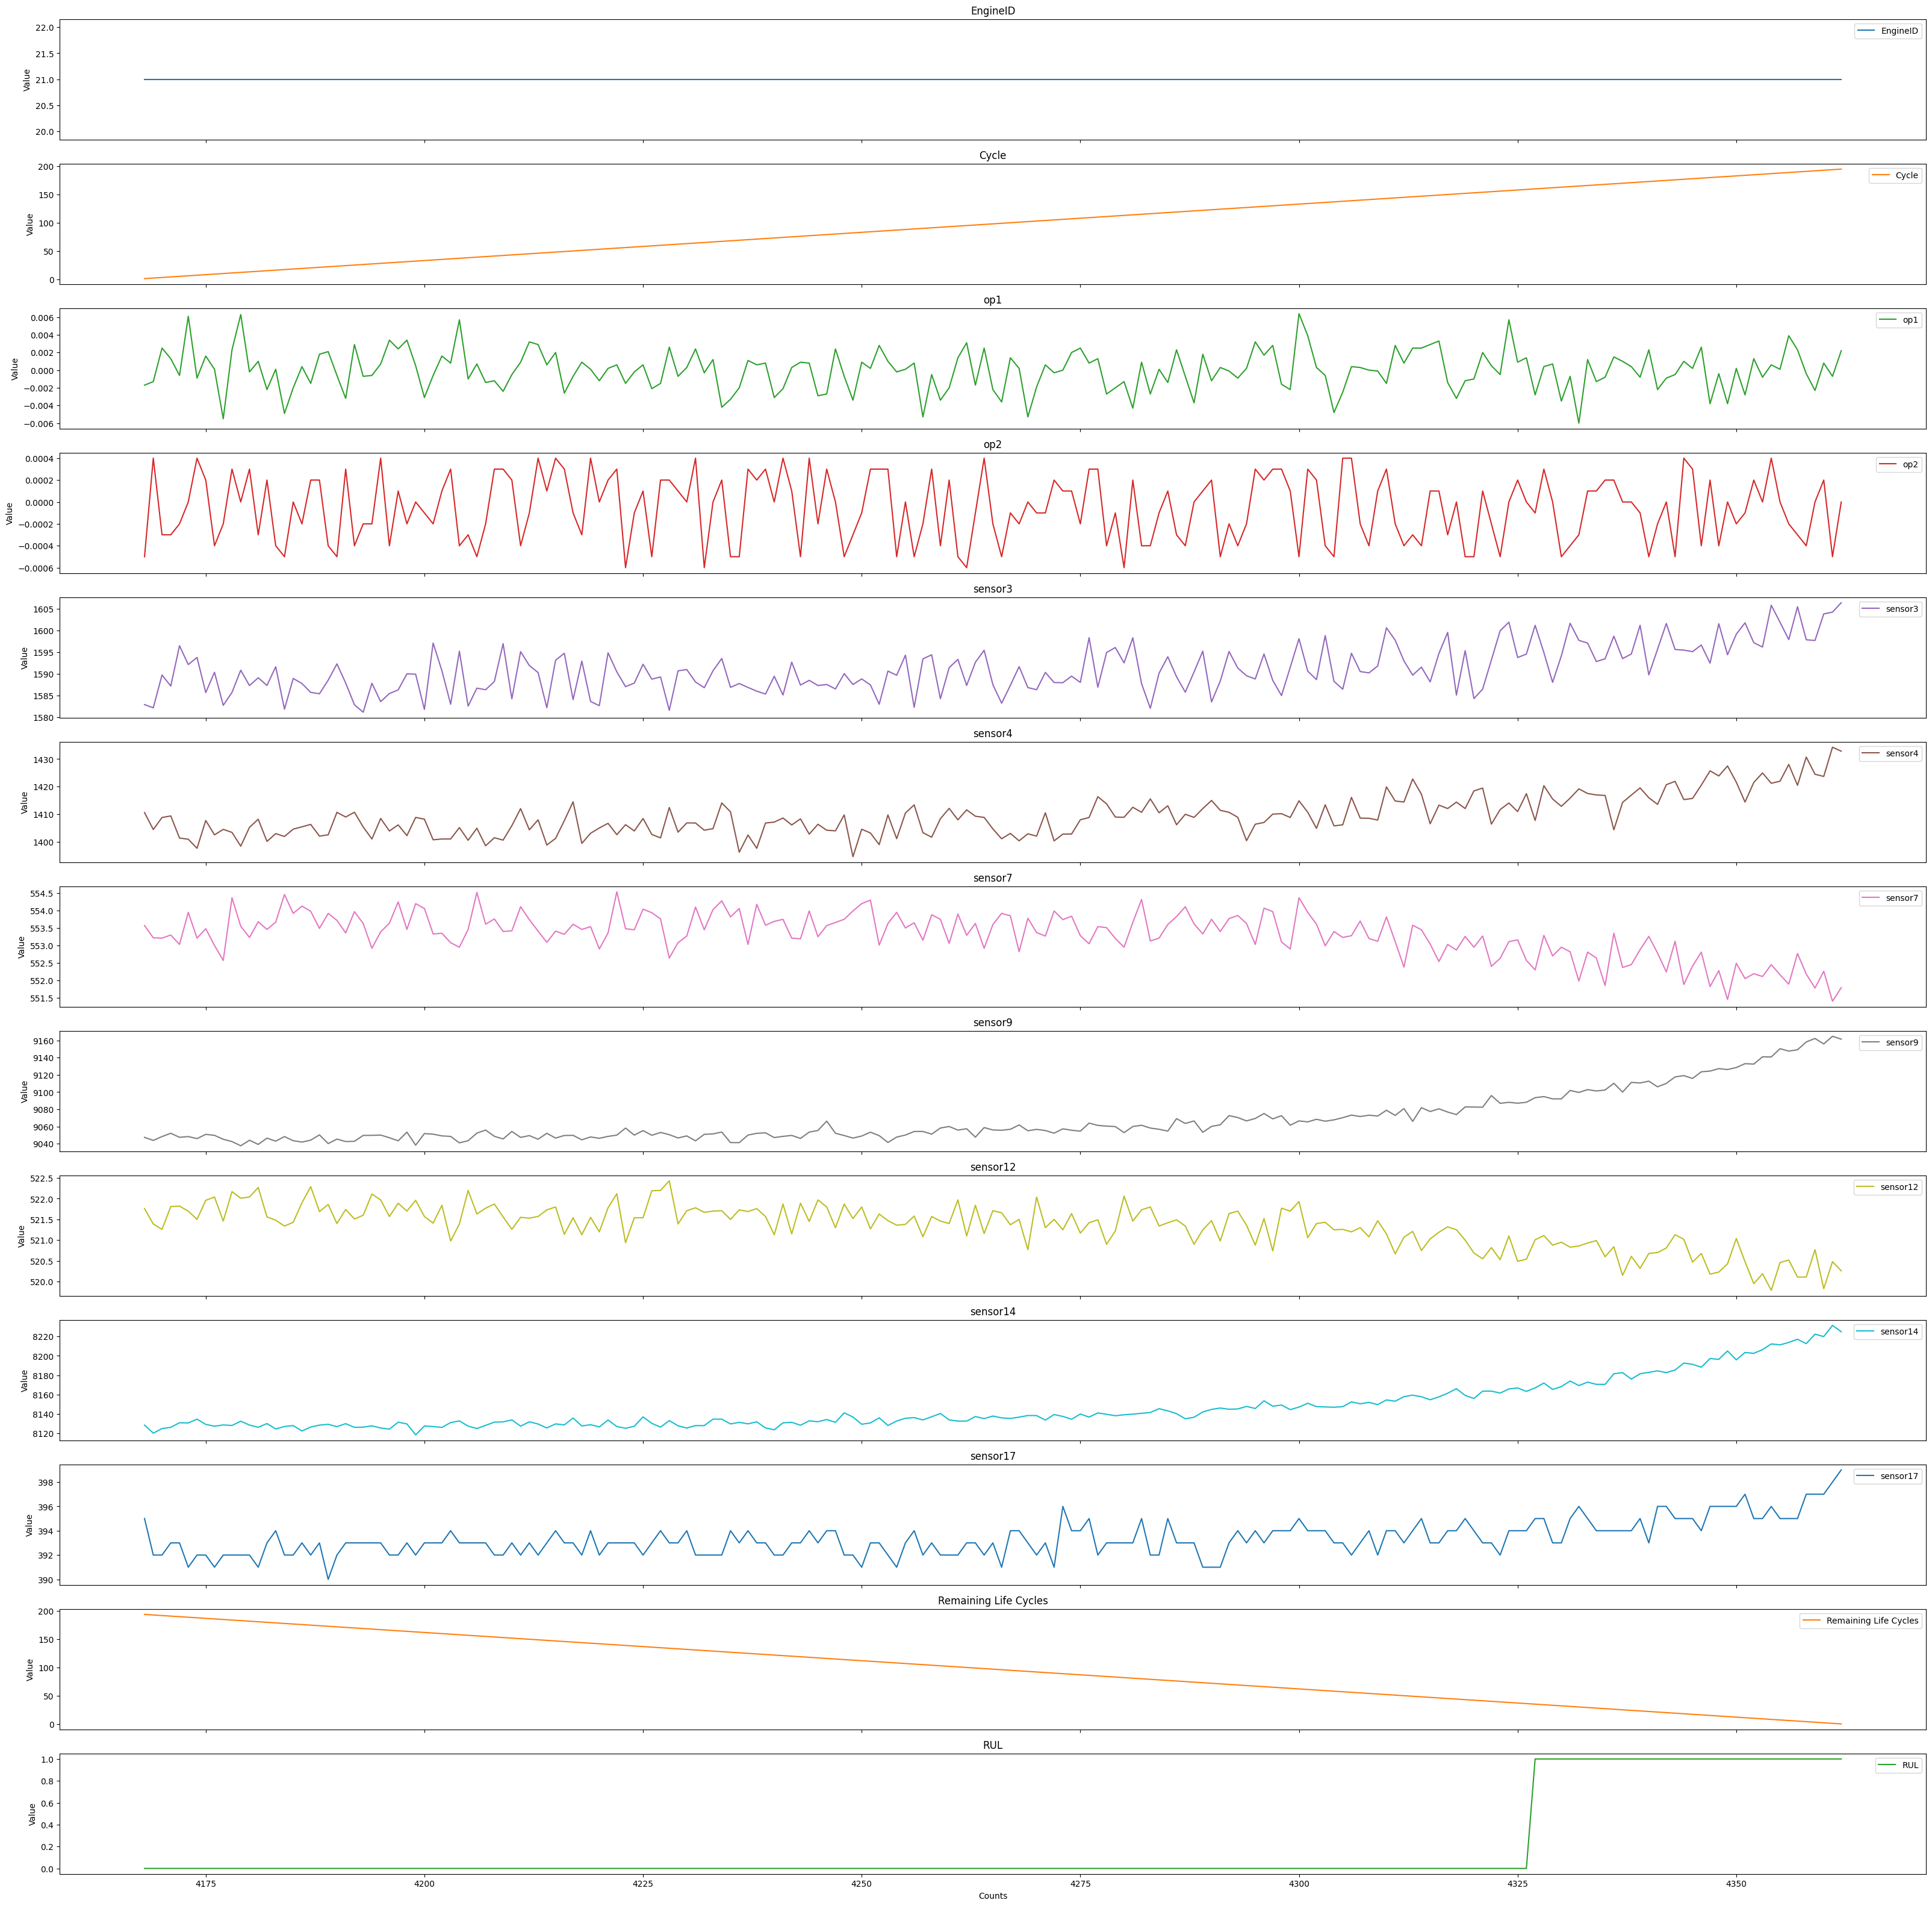

In [693]:
graphs = engine21.plot(subplots=True, sharex=True, figsize=(40,40))
for axis, column in zip(graphs, engine21.columns):
    axis.set_title(column)  # Title for each subplot
    axis.set_ylabel('Value')               # Y-axis label
    axis.set_xlabel('Counts') 

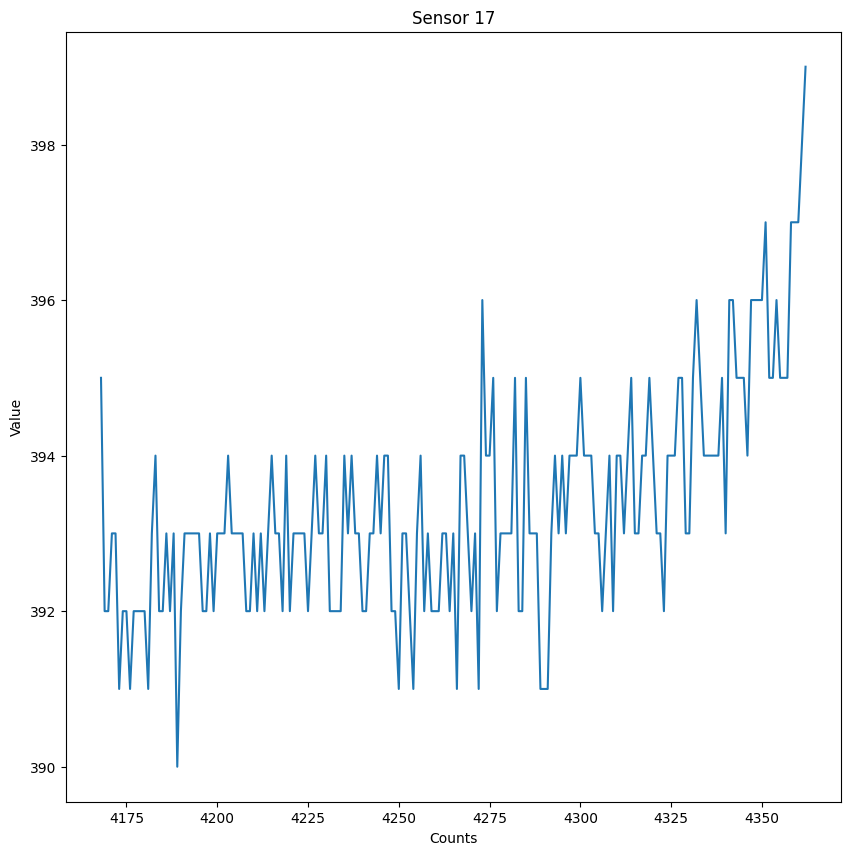

In [694]:
graphs = engine21['sensor17'].plot(subplots=True, sharex=True, figsize=(10,10))
for axis, column in zip(graphs, engine21.columns):
    axis.set_title('Sensor 17')
    axis.set_ylabel('Value')               
    axis.set_xlabel('Counts') 

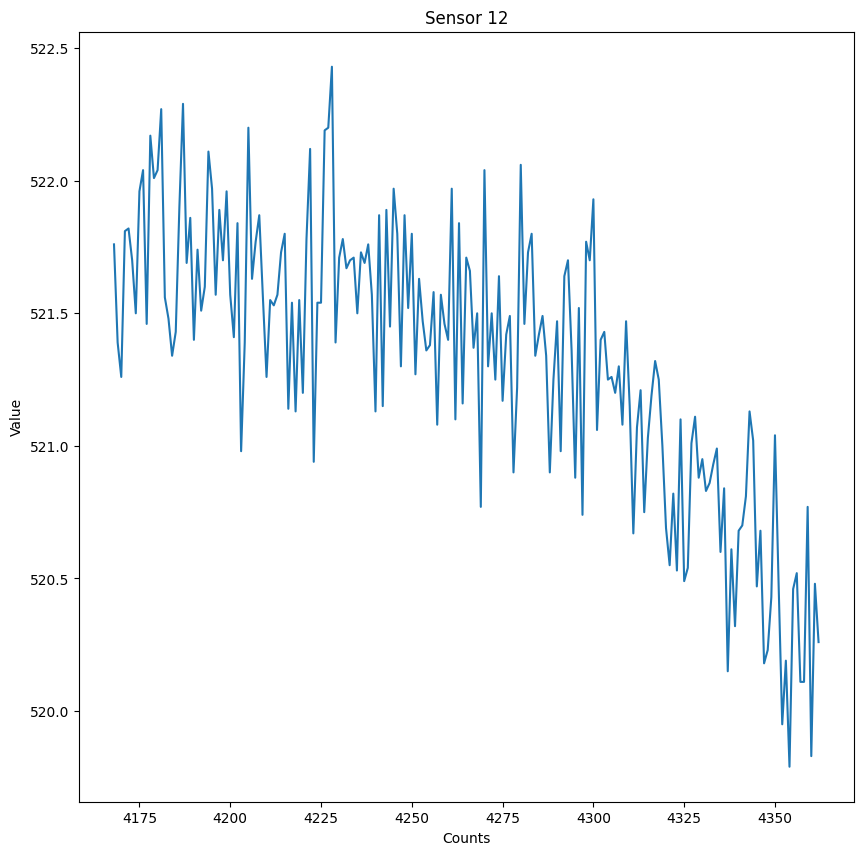

In [695]:
graphs = engine21['sensor12'].plot(subplots=True, sharex=True, figsize=(10,10))
for axis, column in zip(graphs, engine21.columns):
    axis.set_title('Sensor 12')
    axis.set_ylabel('Value')               
    axis.set_xlabel('Counts') 

Creating the SVM model

In [696]:
# We already have the data aplit, so we dont need to do additional splitting.

# Grabbing input features for the training data.
inputs = newDfTrain[['EngineID','Cycle','op1','op2','sensor3','sensor4','sensor7','sensor9','sensor12','sensor14','sensor17','Remaining Life Cycles','RUL']]

# classifier, RUL = 1 or 0
classification = newDfTrain[['RUL']]

# Grabbing input features for the training data.
inputs2 = newDfTest[['EngineID','Cycle','op1','op2','sensor3','sensor4','sensor7','sensor9','sensor12','sensor14','sensor17','Remaining Life Cycles','RUL']]

# classifier, RUL = 1 or 0
classificationTest = newDfTest[['RUL']]





Text(0, 0.5, 'Remaining Life Cycles')

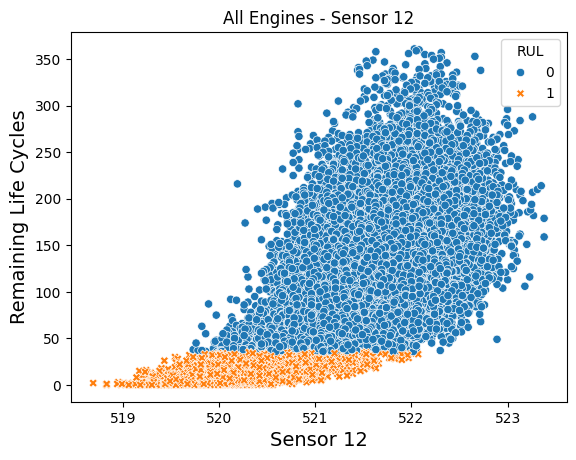

In [697]:
# Plotting sensor 3 data for all engines vs Remaining Lifde Cycles
# Scatter plot for sensor 3 values vs remaining life cycles.

plot = sns.scatterplot(data=newDfTrain, x='sensor12', y='Remaining Life Cycles', hue='RUL', style='RUL')
plot.set_title('All Engines - Sensor 12')
plot.set_xlabel('Sensor 12', fontsize=14)
plot.set_ylabel('Remaining Life Cycles', fontsize=14)

Text(0, 0.5, 'Remaining Life Cycles')

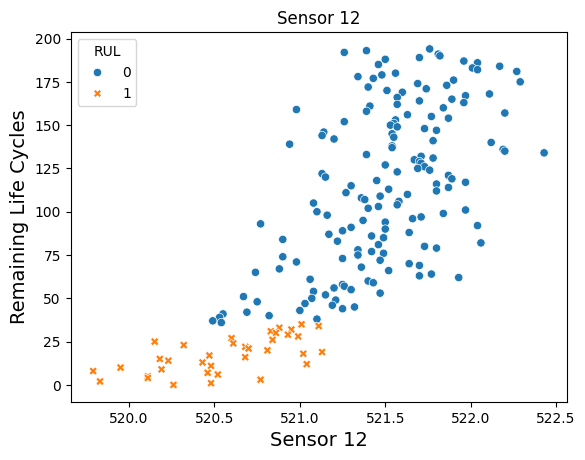

In [698]:
# Still looking at engine 21
# Scatter plot for sensor 12 values vs remaining life cycles.

plot = sns.scatterplot(data=engine21, x='sensor12', y='Remaining Life Cycles', hue='RUL', style='RUL')
plot.set_title('Sensor 12')
plot.set_xlabel('Sensor 12', fontsize=14)
plot.set_ylabel('Remaining Life Cycles', fontsize=14)

Text(0, 0.5, 'Remaining Life Cycles')

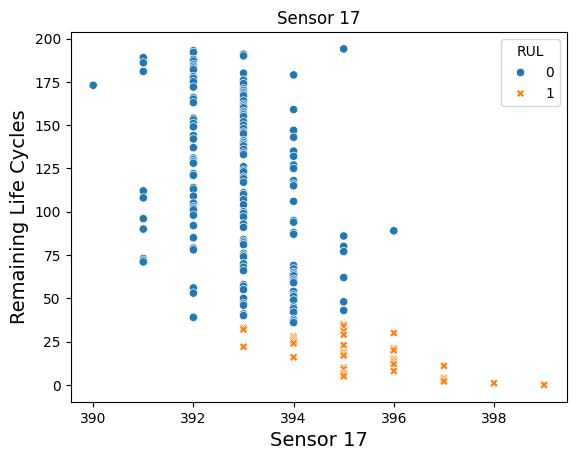

In [699]:
# Now looking at remaining life cycles vs sesnor 17 values

plot = sns.scatterplot(data=engine21, x='sensor17', y='Remaining Life Cycles', hue='RUL', style='RUL')
plot.set_title('Sensor 17')
plot.set_xlabel('Sensor 17', fontsize=14)
plot.set_ylabel('Remaining Life Cycles', fontsize=14)

In [700]:
# Scaling the features
scaler = StandardScaler()

newDfTrain = scaler.fit_transform(newDfTrain)
newDfTest = scaler.transform(newDfTest)

In [701]:
SVC = LinearSVC(C=1.0, max_iter=10000)
SVC.fit(newDfTrain,np.ravel(classification))

LinearSVC(max_iter=10000)

In [702]:
# Evaluate model on testing data
SVC.score(newDfTest, np.ravel(classificationTest))

1.0

In [703]:
# Printing the intercept, w0
print('w0:', SVC.intercept_)

# Printing the coefficients, w1 and w2
print('w1 and w2:', SVC.coef_)

w0: [-0.65137197]
w1 and w2: [[-4.61302623e-05 -3.70410922e-05 -1.38286350e-05 -2.01063797e-05
  -1.82779757e-05 -1.02432902e-05  1.12493794e-05 -6.23973329e-05
   2.01652878e-05  5.70769425e-05 -1.41078225e-05 -5.66265356e-04
   7.58955583e-01]]
